In [53]:
import numpy as np
from math import sqrt

def my_dtc1(x):
    N = len(x)
    X = np.zeros(N)

    for k in range(N):
        if k == 0:
            alpha = sqrt(1/N)
        else:
            alpha = sqrt(2/N)
        somma = 0
        for n in range(N):
            angolo = (np.pi/N) * (n + 0.5) * k
            somma += x[n] * np.cos(angolo)
        X[k] = alpha * somma
    return X

In [54]:
print("DCT-2 Example:")
x = [231, 32, 233, 161, 24, 71, 140, 245]
expected_result = np.array([4.01e+02, 6.60e+00, 1.09e+02, -1.12e+02, 6.54e+01, 1.21e+02, 1.16e+02, 2.88e+01])
result = my_dtc1(x)

# Confronto dei risultati
try:
    np.testing.assert_allclose(result, expected_result, rtol=1e-2, atol=1e-2)
    print("Test passato con successo!")
except AssertionError as e:
    print("Test fallito!")
    print(e)


DCT-2 Example:
Test passato con successo!


In [55]:
def my_dtc2(x):
    ris = np.zeros(len(x))
    ris = np.apply_along_axis(my_dtc1, axis=0, arr=x) # sulle colonne
    ris = np.apply_along_axis(my_dtc1, axis=1, arr=ris) # sulle righe
    return ris

In [56]:
x = np.array([
    [231, 32, 233, 161, 24, 71, 140, 245],
    [247, 40, 248, 245, 124, 204, 36, 107],
    [234, 202, 245, 167, 9, 217, 239, 173],
    [193, 190, 100, 167, 43, 180, 8, 70],
    [11, 24, 210, 177, 81, 243, 8, 112],
    [97, 195, 203, 47, 125, 114, 165, 181],
    [193, 70, 174, 167, 41, 30, 127, 245],
    [87, 149, 57, 192, 65, 129, 178, 228]
])

expected_result = np.array([
    [1.11e+03, 4.40e+01, 7.59e+01, -1.38e+02, 3.50e+00, 1.22e+02, 1.95e+02, -1.01e+02],
    [7.71e+01, 1.14e+02, -2.18e+01, 4.13e+01, 8.77e+00, 9.90e+01, 1.38e+02, 1.09e+01],
    [4.48e+01, -6.27e+01, 1.11e+02, -7.63e+01, 1.24e+02, 9.55e+01, -3.98e+01, 5.85e+01],
    [-6.99e+01, -4.02e+01, -2.34e+01, -7.67e+01, 2.66e+01, -3.68e+01, 6.61e+01, 1.25e+02],
    [-1.09e+02, -4.33e+01, -5.55e+01, 8.17e+00, 3.02e+01, -2.86e+01, 2.44e+00, -9.41e+01],
    [-5.38e+00, 5.66e+01, 1.73e+02, -3.54e+01, 3.23e+01, 3.34e+01, -5.81e+01, 1.90e+01],
    [7.88e+01, -6.45e+01, 1.18e+02, -1.50e+01, -1.37e+02, -3.06e+01, -1.05e+02, 3.98e+01],
    [1.97e+01, -7.81e+01, 9.72e-01, -7.23e+01, -2.15e+01, 8.13e+01, 6.37e+01, 5.90e+00]
])

result = my_dtc2(x)    
# Confronto dei risultati
try:
    np.testing.assert_allclose(result, expected_result, rtol=1e-2, atol=1e-2)
    print("Test passato con successo!")
except AssertionError as e:
    print("Test fallito!")
    print(e)        



Test passato con successo!


In [57]:
from numpy import append
from scipy.fftpack import dct
import time
import random

tempo_mio_list = []
tempo_ottimo_list = []
dimensioni_matrice = [10,50,100,200,300]

for n in dimensioni_matrice:
    x = np.random.rand(n,n)
    inizio_tempo=time.time()
    ris_ottimo = dct(dct(x.T).T)
    fine_tempo=time.time()
    tempo_ottimo = fine_tempo - inizio_tempo
    tempo_ottimo_list.append(tempo_ottimo)
    print(f"Tempo di esecuzione con algoritmo ottimizzato: {tempo_ottimo} secondi")

    inizio_tempo=time.time()
    ris = my_dtc2(x)
    fine_tempo=time.time()
    tempo_mio = fine_tempo-inizio_tempo
    tempo_mio_list.append(tempo_mio)
    print(f"Tempo di esecuzione con algoritmo fatto da me: {tempo_mio} secondi")

    print("differenza tra i due tempi:", tempo_mio - tempo_ottimo)

Tempo di esecuzione con algoritmo ottimizzato: 0.008595943450927734 secondi
Tempo di esecuzione con algoritmo fatto da me: 0.0017251968383789062 secondi
differenza tra i due tempi: -0.006870746612548828
Tempo di esecuzione con algoritmo ottimizzato: 0.00013685226440429688 secondi
Tempo di esecuzione con algoritmo fatto da me: 0.1421971321105957 secondi
differenza tra i due tempi: 0.1420602798461914
Tempo di esecuzione con algoritmo ottimizzato: 0.00026297569274902344 secondi
Tempo di esecuzione con algoritmo fatto da me: 1.0617830753326416 secondi
differenza tra i due tempi: 1.0615200996398926
Tempo di esecuzione con algoritmo ottimizzato: 0.00034689903259277344 secondi
Tempo di esecuzione con algoritmo fatto da me: 8.538070917129517 secondi
differenza tra i due tempi: 8.537724018096924
Tempo di esecuzione con algoritmo ottimizzato: 0.0005030632019042969 secondi
Tempo di esecuzione con algoritmo fatto da me: 28.77078604698181 secondi
differenza tra i due tempi: 28.770282983779907


(50.0, 314.5)

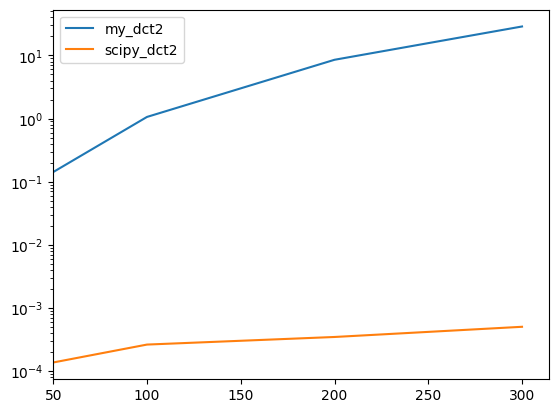

In [58]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

ax.set_yscale('log')
ax.plot(dimensioni_matrice, tempo_mio_list, label='my_dct2')
ax.plot(dimensioni_matrice, tempo_ottimo_list, label='scipy_dct2')
ax.legend(loc='upper left', fontsize=10)
ax.set_xlim(50)